In [1]:
import pandas as pd
import numpy as np

from transformers import AutoTokenizer, AutoModelWithLMHead
from transformers import TranslationPipeline

from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('../../../data/frameworks_data/data_v0.5.1/data_v0.5.1_train.csv')
df_test = pd.read_csv('../../../data/frameworks_data/data_v0.5.1/data_v0.5.1_test.csv')
df_val = pd.read_csv('../../../data/frameworks_data/data_v0.5.1/data_v0.5.1_val.csv')

df_tot = pd.concat([df_train, df_test, df_val])

In [3]:
df_tot.head(2)

,entry_id,lead_id,project_id,analysis_framework_id,excerpt,created_by_id,modified_by_id,verified,sectors,pillars_2d,subpillars_2d,pillars_1d,subpillars_1d
0,165573,39661,2098,1306,260 frontline health staff including medical d...,1152,1152,False,['Health'],['Capacities & Response'],['Capacities & Response->Number Of People Reac...,[],[]
1,161070,38796,2028,1306,The SNFI Cluster updated its recommendations o...,2444,15,False,['WASH'],['Priority Interventions'],['Priority Interventions->Expressed By Humanit...,[],[]


In [4]:
df_tot[['excerpt', 'entry_id', 'sectors', 'subpillars_2d', 'subpillars_1d']]\
            .to_csv('../../../data/frameworks_data/data_v0.5.1/data_v0.5.1_full.csv')

In [5]:
df_language = pd.read_csv('../../../data/frameworks_data/data_v0.4.4/data_v0.4.4_full.csv', index_col=0)[
    ['entry_id', 'language']
]
df_tot = pd.read_csv('../../../data/frameworks_data/data_v0.5.1/data_v0.5.1_full.csv', index_col=0)
#df_specific_needs = pd.read_csv('../../../data/secondary_tags/specific_needs_groups_final.csv', index_col=0)

In [6]:
df_language.head(2)

,entry_id,language
0,163664,en
1,162812,en


In [7]:
df_tot.head(2)

,excerpt,entry_id,sectors,subpillars_2d,subpillars_1d
0,260 frontline health staff including medical d...,165573,['Health'],['Capacities & Response->Number Of People Reac...,[]
1,The SNFI Cluster updated its recommendations o...,161070,['WASH'],['Priority Interventions->Expressed By Humanit...,[]


In [8]:
df_merged = pd.merge(
    left=df_tot,
    right=df_language,
    on='entry_id',
    how='left'
)

In [9]:
df_merged.head()

,excerpt,entry_id,sectors,subpillars_2d,subpillars_1d,language
0,260 frontline health staff including medical d...,165573,['Health'],['Capacities & Response->Number Of People Reac...,[],en
1,The SNFI Cluster updated its recommendations o...,161070,['WASH'],['Priority Interventions->Expressed By Humanit...,[],en
2,Reported measures taken cope with problems usi...,165654,['WASH'],['Humanitarian Conditions->Coping Mechanisms'],[],en
3,To monitor Infection Control & Prevention (IPC...,165576,['Health'],['Capacities & Response->Number Of People Reac...,[],en
4,All the waste workers we interviewed had alrea...,165559,[],[],[],NaN


In [35]:
from tqdm import tqdm
tqdm.pandas()

In [37]:
import re
from tqdm import tqdm
tqdm.pandas()

In [38]:
# get the model
# https://fasttext.cc/docs/en/language-identification.html
# https://dl.fbaipublicfiles.com/fasttext/supervised-models/lid.176.bin
fmodel = fasttext.load_model(path_to_pretrained_model)
def lang_detect_ft(doc):
    if isinstance(doc, str):
        doc = re.sub("\s+", " ", doc)
        return fmodel.predict([doc])[0][0][0][len("__label__"):]
    return np.nan

In [22]:
not_labeled = df_merged[df_merged.language.isna()]

In [44]:
df_merged["language"] = df_merged["excerpt"].progress_apply(lang_detect_ft)

100%|██████████| 137801/137801 [00:16<00:00, 8344.46it/s]


<AxesSubplot:xlabel='language', ylabel='Count'>

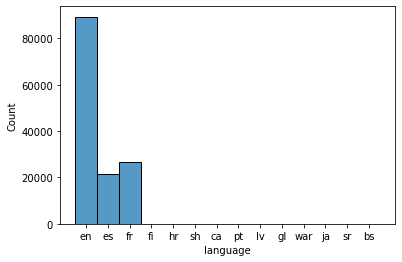

In [47]:
import seaborn as sns
sns.histplot(df_merged.language)

In [12]:
df_present = df_merged[df_merged.apply(lambda x: len(x.sectors)>2 and len(x.subpillars_2d)>2, axis=1)]

In [13]:
df_present

,excerpt,entry_id,sectors,subpillars_2d,subpillars_1d,language
0,260 frontline health staff including medical d...,165573,['Health'],['Capacities & Response->Number Of People Reac...,[],en
1,The SNFI Cluster updated its recommendations o...,161070,['WASH'],['Priority Interventions->Expressed By Humanit...,[],en
2,Reported measures taken cope with problems usi...,165654,['WASH'],['Humanitarian Conditions->Coping Mechanisms'],[],en
3,To monitor Infection Control & Prevention (IPC...,165576,['Health'],['Capacities & Response->Number Of People Reac...,[],en
5,Although most workers we interviewed know abou...,165558,['Health'],['Capacities & Response->Number Of People Reac...,[],en
...,...,...,...,...,...,...
137605,"Près de 1,6 millions de personnes déplacées ou...",246754,['Protection'],['Humanitarian Conditions->Number Of People In...,[],fr
137624,[concernant les chiffres des PIN en insécurité...,246776,['Food Security'],['Humanitarian Conditions->Number Of People In...,[],fr
137653,’après les résultats du 18ème cycle de l’analy...,246775,['Food Security'],['Humanitarian Conditions->Number Of People In...,[],fr
137670,[données de juillet 2020 dans les 6 territoire...,274225,['Food Security'],['Humanitarian Conditions->Number Of People In...,[],fr


In [52]:
all_primary_tags_entires = df_present.entry_id.tolist()

In [49]:
len(set(list(df_specific_needs.entry_id)).intersection(set(list(df_tot.entry_id))))

6956

In [56]:
merged = pd.merge(
    df_tot[['entry_id', 'language']],
    df_specific_needs,
    on='entry_id',
    how='right'
)

In [72]:
from langdetect import detect
tmp = []
for text in tqdm(not_labeled_data.excerpt):
    lang = detect(text)
    tmp.append(lang)


100%|██████████| 584/584 [00:05<00:00, 116.63it/s]


In [76]:
merged.to_csv('../../../data/secondary_tags/specific_needs_groups_final_with_language.csv')

In [4]:
df_subs = pd.read_csv('../../../data/secondary_tags/specific_needs_groups_final_with_language.csv')

SyntaxError: invalid character in identifier (<ipython-input-4-a77cc146d96d>, line 1)

In [19]:
en_df = df_subs[df_subs.language=='en']
fr_df = df_subs[df_subs.language=='fr']
es_df = df_subs[df_subs.language=='es']

In [81]:
"""model = AutoModelWithLMHead.from_pretrained("Helsinki-NLP/opus-mt-fr-en")
tokenizer = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-fr-en")
translation = TranslationPipeline(model=model, tokenizer=tokenizer)

fr_to_en_texts = []
false_inds = []
for text in tqdm(fr_df.excerpt):
    try:
        translated_text = translation(text, max_length=512)[0]['translation_text']
        fr_to_en_texts.append(translated_text)
    except IndexError :
        false_inds.append(text)
        pass"""

Downloading:   0%|          | 0.00/1.29k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/301M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/802k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/778k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.34M [00:00<?, ?B/s]

 45%|████▌     | 569/1255 [19:15<26:46,  2.34s/it]  Token indices sequence length is longer than the specified maximum sequence length for this model (1486 > 512). Running this sequence through the model will result in indexing errors
Your input_length: 1486 is bigger than 0.9 * max_length: 512. You might consider increasing your max_length manually, e.g. translator('...', max_length=400)
100%|██████████| 1255/1255 [47:58<00:00,  2.29s/it] 


In [84]:
"""fr_df = fr_df.drop(fr_df.index[[569]])"""

In [87]:
"""en_from_fr = fr_df.copy()
en_from_fr['excerpt'] = fr_to_en_texts
en_from_fr.to_csv('../../../data/secondary_tags/augmented_data/en_from_fr.csv')
"""

In [11]:
from transformers import MarianMTModel, MarianTokenizer
src_text = [
    '>>fra<< this is a sentence in english that we want to translate to french',
    '>>por<< This should go to portuguese',
    '>>esp<< And this to Spanish'
]

model_name = 'Helsinki-NLP/opus-mt-en-roa'
tokenizer = MarianTokenizer.from_pretrained(model_name)

model = MarianMTModel.from_pretrained(model_name)


Downloading:   0%|          | 0.00/786k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/793k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.26M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

['>>zlm_Latn<<', '>>mfe<<', '>>hat<<', '>>pap<<', '>>ast<<', '>>cat<<', '>>ind<<', '>>glg<<', '>>wln<<', '>>spa<<', '>>fra<<', '>>ron<<', '>>por<<', '>>ita<<', '>>oci<<', '>>arg<<', '>>min<<']


Downloading:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/295M [00:00<?, ?B/s]

["c'est une phrase en anglais que nous voulons traduire en français",
 'Isto deve ir para o português',
 'esto al español']

In [12]:
for _ in range (10):
    translated = model.generate(**tokenizer(src_text, return_tensors="pt", padding=True))
    [tokenizer.decode(t, skip_special_tokens=True) for t in translated]

In [3]:
from transformers import AutoTokenizer, AutoModelWithLMHead
from transformers import TranslationPipeline

model = AutoModelWithLMHead.from_pretrained("Helsinki-NLP/opus-mt-en-fr")
tokenizer = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-en-fr")
translation = TranslationPipeline(model=model, tokenizer=tokenizer)



Downloading:   0%|          | 0.00/1.29k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/301M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/778k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/802k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.34M [00:00<?, ?B/s]

In [9]:
translation(['This is an example of translation', 'This is a sentence'], max_length=512)[0]['translation_text']

"C'est un exemple de traduction"

In [10]:
translation(['This is a sentence'], max_length=512)[0]['translation_text']

"C'est une phrase."

In [20]:
model = AutoModelWithLMHead.from_pretrained("Helsinki-NLP/opus-mt-es-en")
tokenizer = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-es-en")
translation = TranslationPipeline(model=model, tokenizer=tokenizer)

es_to_en_texts = []
false_inds = []
excerpt_list = list(es_df.excerpt)
for i in tqdm(range(len(excerpt_list))):
    try:
        translated_text = translation(excerpt_list[i], max_length=512)[0]['translation_text']
        es_to_en_texts.append(translated_text)
    except IndexError :
        false_inds.append(i)
        pass
    


Downloading:   0%|          | 0.00/1.19k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/312M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/826k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/802k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.59M [00:00<?, ?B/s]

  2%|▏         | 38/2352 [01:20<1:24:31,  2.19s/it]Token indices sequence length is longer than the specified maximum sequence length for this model (790 > 512). Running this sequence through the model will result in indexing errors
Your input_length: 790 is bigger than 0.9 * max_length: 512. You might consider increasing your max_length manually, e.g. translator('...', max_length=400)
 36%|███▌      | 842/2352 [31:12<24:30,  1.03it/s]  Your input_length: 1287 is bigger than 0.9 * max_length: 512. You might consider increasing your max_length manually, e.g. translator('...', max_length=400)
Your input_length: 482 is bigger than 0.9 * max_length: 512. You might consider increasing your max_length manually, e.g. translator('...', max_length=400)
 57%|█████▋    | 1332/2352 [51:11<46:30,  2.74s/it]  Your input_length: 598 is bigger than 0.9 * max_length: 512. You might consider increasing your max_length manually, e.g. translator('...', max_length=400)
Your input_length: 485 is bigger than

In [21]:
if len (false_inds)>0:
    es_df = es_df.drop(es_df.index[false_inds])
    


In [8]:
#es_df = es_df.iloc[:531]

In [22]:
en_from_es = es_df.copy()
en_from_es['excerpt'] = es_to_en_texts
en_from_es.drop(columns=['Unnamed: 0']).to_csv('../../../data/secondary_tags/augmented_data/en_from_es.csv')

In [23]:
en_from_es

,Unnamed: 0,entry_id,language,excerpt,specific_needs_groups
3,3,24453,es,"In vast areas of southern Venezuela, Colombian...",['Minorities']
6,6,10628,es,Reasons for migrating: The main reason identif...,['Female Head of Household']
7,7,10631,es,Migration status: The majority of the women in...,['Female Head of Household']
9,9,10634,es,Living conditions: One more element that requi...,['Female Head of Household']
24,24,63910,es,"Since the beginning of the year, the UN has di...",['Pregnant or Lactating Women']
...,...,...,...,...,...
6170,6170,341895,es,This situation increases the likelihood of cla...,['Indigenous people']
6986,6986,341898,es,Protection: The presence of the security force...,['Indigenous people']
6997,6997,341902,es,The confinement of the communities was confirm...,['Indigenous people']
6999,6999,341903,es,The delivery of immediate food kits by the may...,['Indigenous people']


In [33]:
import os

In [65]:
files = os.listdir()
files

['en_from_fr.csv',
 'es_from_fr_second_part.csv',
 'es_from_en.csv',
 'fr_from_en_second_part.csv',
 'fr_from_es_second_part.csv',
 'specific_needs_groups_final_with_language.csv',
 'fr_from_es_first_part.csv',
 'en_from_es.csv',
 'fr_from_en_first_part.csv',
 'es_from_fr_first_part.csv',
 'es_from_fr_third_part.csv']

In [66]:
files.pop(5)

'specific_needs_groups_final_with_language.csv'

In [67]:
final_df = pd.read_csv('specific_needs_groups_final_with_language.csv', index_col=0)[
    ['entry_id', 'excerpt', 'specific_needs_groups']
]

for name in files:
    df_tmp = pd.read_csv(name, index_col=0)[['entry_id', 'excerpt', 'specific_needs_groups']]
    final_df = pd.concat([final_df, df_tmp])

In [71]:
final_df

,entry_id,excerpt,specific_needs_groups
0,133321,"In Syria, UNHCR provided guidance to partners ...",['Persons with Disability']
1,25684,HelpAge’s country team and partners are reachi...,['Persons with Disability']
2,88087,"During May and June, health sector partners ca...",['Persons with Disability']
3,24453,"En vastas áreas del sur de Venezuela, guerrill...",['Minorities']
4,27008,The UN Office for the Coordination of Humanita...,['Pregnant or Lactating Women']
...,...,...,...
6957,234525,"Entre su población, estimada en más de 20 mill...",['Minorities']
6965,209497,55 de cada 100 centros de salud entrevistados ...,['GBV survivors']
7131,342780,"El jueves, violentos enfrentamientos, cuyas im...",['Minorities']
7132,342779,"La comunidad islámica de RD Congo, que represe...",['Minorities']


In [69]:
final_df['specific_needs_groups'] = final_df['specific_needs_groups'].apply(
    lambda x: x.replace('Religious minority', 'Minorities')\
                .replace('Ethnic minority', 'Minorities')\
                .replace('Stateless', 'People with irregular status')
)

In [70]:
final_df.to_csv('../augmented_specific_needs_groups.csv')

In [33]:
languages = []
for text_tmp in tqdm(df_full.excerpt):
    try:
        lg = Detector(text_tmp).languages[0]

        languages.append(lg.name)
    except:
        languages.append('UNKNOWN')

  0%|          | 0/7540 [00:00<?, ?it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 12%|█▏        | 921/7540 [00:00<00:00, 9204.37it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language 

In [34]:
df_full['language'] = pd.Series(languages)

In [ ]:
def keep_wanted_languages(x):
    if x=='English' or x=='French'

df_full = df_full[df_full.language.apply()]

In [36]:
#df_full.to_csv('../../../data/frameworks_data/data_v0.5.1/data_v0.5.1_full.csv')

In [ ]:
fr_df = df_full[df_full.language=='French']
fr_df

In [25]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

tokenizer = T5Tokenizer.from_pretrained('t5-small')

model = T5ForConditionalGeneration.from_pretrained('t5-small', return_dict=True)

Downloading:   0%|          | 0.00/792k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/242M [00:00<?, ?B/s]

In [ ]:
fr_to_en_t5 = []
for text in tqdm(fr_df.excerpt):
    input_ids = tokenizer("translate French to English: "+text, return_tensors="pt").input_ids  # Batch size 1

    outputs = model.generate(input_ids)

    decoded = tokenizer.decode(outputs[0], skip_special_tokens=True)
    
    fr_to_en_t5.append(decoded)

In [64]:
languages = []
for text_tmp in tqdm(not_labeled_data.excerpt):
    b = TextBlob(text_tmp)
    languages.append(b.detect_language())

 36%|███▋      | 213/584 [01:24<02:26,  2.53it/s]


HTTPError: HTTP Error 429: Too Many Requests

In [ ]:
np.unique(languages)

In [6]:
en_df = df_subs[df_subs.language=='en']
fr_df = df_subs[df_subs.language=='fr']
es_df = df_subs[df_subs.language=='es']

In [ ]:
"""
1) code to

fr -> es
es -> fr
en -> es
en -> fr
fr -> en
es -> en

2) detect language in text and apply language

3) Merge models: demographic groups, sectors, 2d subpillars

4) Augment data for 1d subpillars, specific needs groups
"""

In [9]:
model = AutoModelWithLMHead.from_pretrained("Helsinki-NLP/opus-mt-fr-es")
tokenizer = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-fr-es")

/home/selim/anaconda3/lib/python3.8/site-packages/transformers/models/auto/modeling_auto.py:843: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(


Downloading:   0%|          | 0.00/1.13k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/332M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/812k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/819k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.34M [00:00<?, ?B/s]

In [10]:
translation = TranslationPipeline(model=model, tokenizer=tokenizer)

In [11]:
fr_to_es_texts = []
for text in tqdm(fr_df.excerpt.sample(n=50)):
    translated_text = translation(text, max_length=256)[0]['translation_text']
    fr_to_es_texts.append(translated_text)

 48%|████▊     | 24/50 [01:07<01:13,  2.83s/it]


KeyboardInterrupt: 